# WeatherPy
----

### Analysis
* Temperature shows a strong correlation to lattitude, with cities closest to the equator having the highest temperatures. It's interesting that there are fewer low-temperature cities in the lower lattitudes, part of this seems to be that there are fewer cities in the lowest part of the southern hemisphere (note that cities go as far north as 80 degrees lattitude, but few even approach -60 degrees lattitude). Looking just between -40 to +40 the chart is more symmetrical, though still greater numbers of cold cities in the north as the northern hemisphere is just coming out of winter as the southern hemisphere is coming out of summer.
* Cloudiness does seem to develop bands at certain percentages - would be worth looking at whether this is a function of how accurately cloud coverage can be reported (i.e. are they rounding to the nearest 10% mark in many areas?).
* Typical Wind Speed doesn't show much variation with lattitude, with most cities being relatively calm regardless of location. However there does appear to be a greater incidence of high-wind cities at the highest/lowest lattitudes.

---


### Import Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

### Function List

In [2]:
# Generate list of random cities
def random_cities():    
    # List for holding lat_lngs and cities (notebook starter code)
    lat_lngs = []
    cities = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
    return cities

# Return weather information for a list of cities
def city_weather(cities):    
    settings = {"units": "imperial", "appid": api_key}
    all_weather = []
    i = 1

    for city in cities:
        try:
            weather = owm.get_current(city, **settings)
            print(f'Processing Record {i} of {len(cities)} | {city}')
            all_weather.append(weather)
            i += 1
        except:
            print("City not found. Skipping...")
            i += 1
    return all_weather

# Turn list of open weather city data dictionaries into a dataframe
def weather_frame(all_weather):    
    column_names = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Longitude', 'Lattitude', 'Max Temperature', 'Wind Speed']
    summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lon", "coord.lat", "main.temp_max", "wind.speed"]

    weather_summary = [response(*summary) for response in all_weather]
    weather_df = pd.DataFrame(weather_summary, columns=column_names)
    weather_df = weather_df.dropna()
    weather_df = weather_df.set_index('City')
    weather_df = weather_df[weather_df.Humidity < 105] # Remove rows where humidity is significantly above 100%
    return weather_df

# Plot Lattitude vs selected column
def lattitude_vs(data, column, y_label):
    data.plot.scatter('Lattitude', column, edgecolors='k', s=40, alpha=.85)
    today = date.today()
    plt.title(f'City Lattitude vs {column} {today}')
    plt.ylabel(y_label)
    plt.grid()
    plt.savefig(f'Lattitude vs {column}.png')
    plt.show()

### Generate City List and Perform API Calls
* Generate random list of cities
* Perform a weather check on each city using a series of successive API calls.
* Repeat list generation and weather check until more than 500 cities are included in the data set
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
cities = random_cities()
all_weather = city_weather(cities)
while len(all_weather) < 500:
    cities = random_cities()
    all_weather = city_weather(cities)

Processing Record 1 of 618 | ust-koksa
City not found. Skipping...
Processing Record 3 of 618 | ilulissat
Processing Record 4 of 618 | farafangana
Processing Record 5 of 618 | blagoyevo
Processing Record 6 of 618 | clyde river
Processing Record 7 of 618 | port alfred
Processing Record 8 of 618 | atuona
Processing Record 9 of 618 | tuktoyaktuk
Processing Record 10 of 618 | mnogovershinnyy
Processing Record 11 of 618 | winnemucca
Processing Record 12 of 618 | kavieng
Processing Record 13 of 618 | mildura
Processing Record 14 of 618 | butaritari
Processing Record 15 of 618 | biak
Processing Record 16 of 618 | guerrero negro
Processing Record 17 of 618 | colquechaca
Processing Record 18 of 618 | mataura
Processing Record 19 of 618 | zhigansk
Processing Record 20 of 618 | new norfolk
Processing Record 21 of 618 | swift current
Processing Record 22 of 618 | amazar
City not found. Skipping...
Processing Record 24 of 618 | ushuaia
Processing Record 25 of 618 | bluff
Processing Record 26 of 618

Processing Record 213 of 618 | hamilton
Processing Record 214 of 618 | carutapera
City not found. Skipping...
Processing Record 216 of 618 | dunedin
City not found. Skipping...
Processing Record 218 of 618 | gravdal
Processing Record 219 of 618 | antofagasta
Processing Record 220 of 618 | los llanos de aridane
Processing Record 221 of 618 | pauini
Processing Record 222 of 618 | shimoda
City not found. Skipping...
Processing Record 224 of 618 | acari
Processing Record 225 of 618 | bairnsdale
Processing Record 226 of 618 | okha
Processing Record 227 of 618 | mogadishu
Processing Record 228 of 618 | lata
Processing Record 229 of 618 | tshikapa
Processing Record 230 of 618 | rincon
Processing Record 231 of 618 | cabo san lucas
City not found. Skipping...
Processing Record 233 of 618 | san carlos de bariloche
Processing Record 234 of 618 | chuy
Processing Record 235 of 618 | tarusa
Processing Record 236 of 618 | kokkola
Processing Record 237 of 618 | victoria
Processing Record 238 of 618 | 

Processing Record 422 of 618 | mareeba
Processing Record 423 of 618 | constantine
Processing Record 424 of 618 | dudinka
Processing Record 425 of 618 | opoczno
Processing Record 426 of 618 | tokur
Processing Record 427 of 618 | sulangan
Processing Record 428 of 618 | zarya
Processing Record 429 of 618 | la ronge
Processing Record 430 of 618 | rupert
Processing Record 431 of 618 | iskateley
Processing Record 432 of 618 | buala
Processing Record 433 of 618 | jiayuguan
Processing Record 434 of 618 | gorlice
Processing Record 435 of 618 | simao
Processing Record 436 of 618 | grand-lahou
City not found. Skipping...
Processing Record 438 of 618 | nichinan
Processing Record 439 of 618 | waingapu
Processing Record 440 of 618 | tiarei
Processing Record 441 of 618 | pangnirtung
Processing Record 442 of 618 | takoradi
City not found. Skipping...
Processing Record 444 of 618 | huron
Processing Record 445 of 618 | ginda
Processing Record 446 of 618 | sisophon
Processing Record 447 of 618 | beloha
C

### Turn Raw Data into DataFrame
* Convert data into DataFrame
* Save DataFrame to CSV
* Display top of Weather DataFrame

In [10]:
# Convert data to DataFrame
weather_df = weather_frame(all_weather)

# Save dataframe as a CSV
weather_df.to_csv('weather_data.csv')

# Display top of DataFrame
weather_df.head()

,Cloudiness,Country,Date,Humidity,Longitude,Lattitude,Max Temperature,Wind Speed
City,,,,,,,,
Ust-Koksa,76,RU,1554317538,79,85.62,50.27,29.55,2.19
Ilulissat,75,GL,1554313800,67,-51.10,69.22,19.40,23.04
Farafangana,0,MG,1554317539,100,47.83,-22.82,76.80,3.65
Blagoyevo,8,RU,1554317539,78,47.92,63.37,33.96,6.67
Clyde River,75,CA,1554314400,61,-68.59,70.47,12.20,8.05


### Plotting the Data
* Use plotting function with dataframe, column, and Y label passed as variables
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

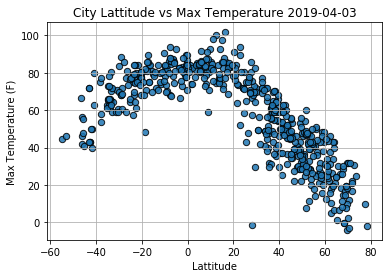

In [5]:
lattitude_vs(weather_df, 'Max Temperature', 'Max Temperature (F)')

#### Latitude vs. Humidity Plot

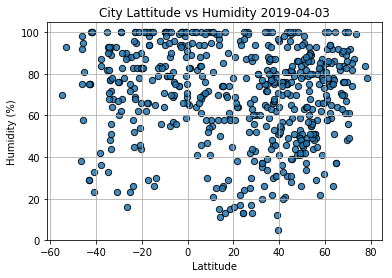

In [6]:
lattitude_vs(weather_df, 'Humidity', 'Humidity (%)')

#### Latitude vs. Cloudiness Plot

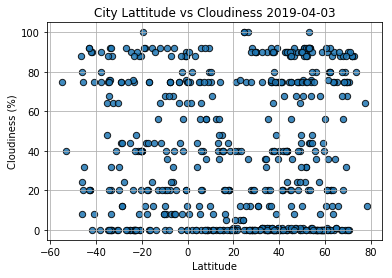

In [7]:
lattitude_vs(weather_df, 'Cloudiness', 'Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

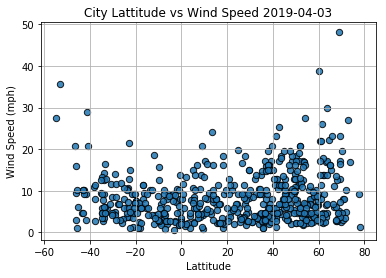

In [8]:
lattitude_vs(weather_df, 'Wind Speed', 'Wind Speed (mph)')